In [16]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

## Version 1 - No Early Stopping, Binary Cross-entropy

In [7]:
files = glob('*history*.h5')

In [8]:
files

['mnist_05perror_history_v1.h5',
 'mnist_10perror_history_v1.h5',
 'mnist_20perror_history_v1.h5',
 'mnist_30perror_history_v1.h5',
 'mnist_40perror_history_v1.h5',
 'mnist_50perror_history_v1.h5']

In [9]:
i = h5py.File(files[0],'r')

In [10]:
list(i.keys())

['acc', 'loss', 'val_acc', 'val_loss']

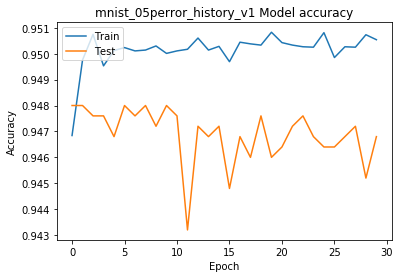

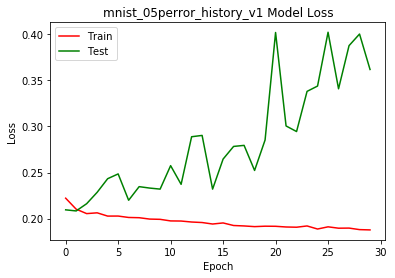

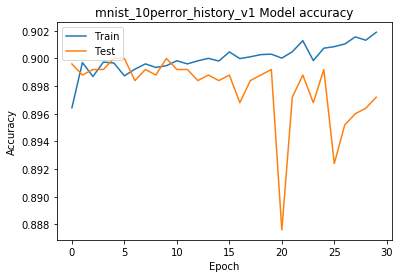

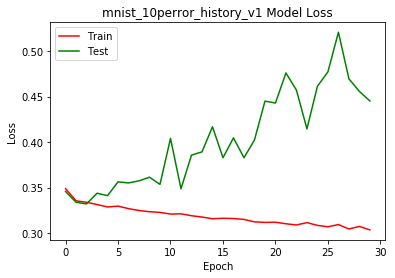

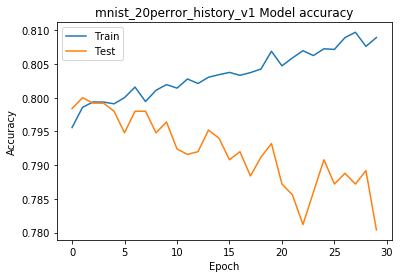

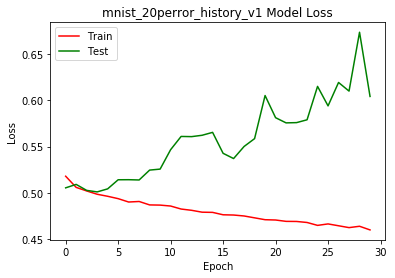

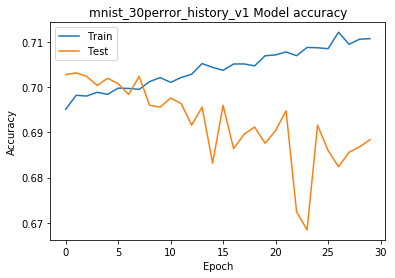

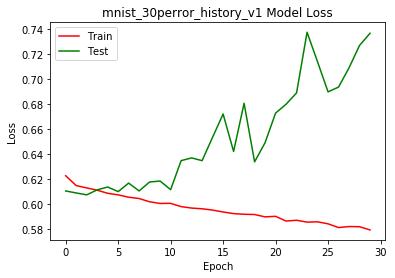

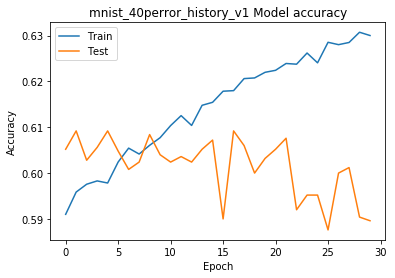

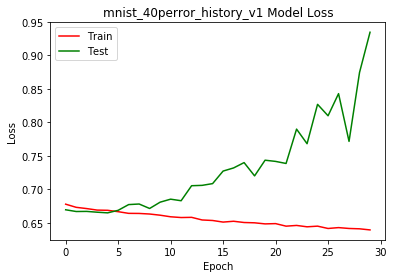

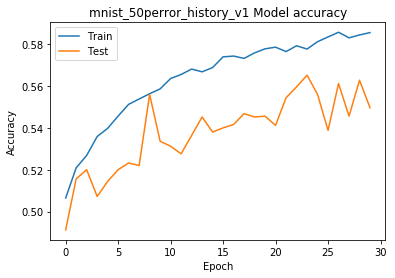

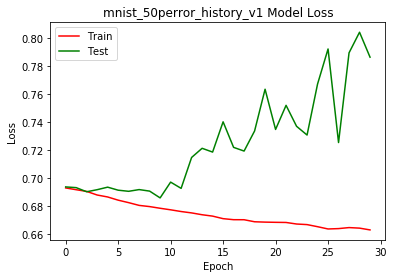

In [12]:
for f in files:
    history = h5py.File(f,'r')
    plt.plot(history['acc'][:])
    plt.plot(history['val_acc'][:])
    plt.title(f.split('.')[0]+' Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history['loss'],color='r')
    plt.plot(history['val_loss'],color='g')
    plt.title(f.split('.')[0]+' Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [14]:
data = keras.datasets.mnist.load_data()

In [34]:
seven_imgs_test = []
seven_labels_test = []
for idx,label in enumerate(data[1][1]):
    if label == 7:
        im_max =data[1][0][idx].max()
        seven_imgs_test.append(data[1][0][idx]/im_max)
        seven_labels_test.append(label)
seven_imgs_test = np.array(seven_imgs_test)
seven_labels_test = np.array(seven_labels_test)

In [35]:
X_left = np.array([np.fliplr(img) for img in seven_imgs_test])
X = np.expand_dims(np.concatenate((seven_imgs_test,X_left),axis=0),axis=3)
Y = np.concatenate((np.ones((seven_imgs_test.shape[0],)),np.zeros((X_left.shape[0],))),axis=0)

In [17]:
modelE = keras.models.Sequential()
modelE.add(Conv2D(64, (3, 3), input_shape=(28, 28,1)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))


modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelE.add(Dense(64))
modelE.add(Activation('relu'))
modelE.add(Dropout(0.5))
modelE.add(Dense(1))
modelE.add(Activation('sigmoid'))

modelE.compile(loss='binary_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

In [18]:
weights = glob('*weights*.h5')

In [19]:
weights

['mnist_05perror_weights_v1.h5',
 'mnist_10perror_weights_v1.h5',
 'mnist_20perror_weights_v1.h5',
 'mnist_30perror_weights_v1.h5',
 'mnist_40perror_weights_v1.h5',
 'mnist_50perror_weights_v1.h5']

In [27]:
int('mnist_05perror_weights_v1.h5'.split('_')[1].split('p')[0])

5

In [36]:
label_error = []
test_acc = []
for w in weights:
    modelE.load_weights(w)
    loss, acc = modelE.evaluate(X,Y)
    label_error.append(int(w.split('_')[1].split('p')[0]))
    test_acc.append(acc)
    

65/65 [==============================] - 0s 4ms/step - loss: 0.8804 - accuracy: 0.4786


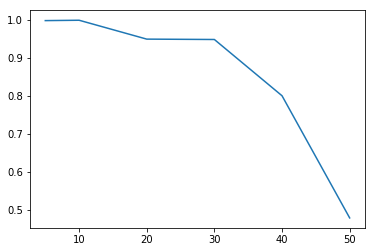

In [37]:
plt.plot(label_error,test_acc)

## Version 2 - With Early Stopping, Binary Cross-entropy

In [38]:
files = glob('*history*v2*.h5')

In [39]:
files

['mnist_00perror_history_v2.h5',
 'mnist_05perror_history_v2.h5',
 'mnist_10perror_history_v2.h5',
 'mnist_20perror_history_v2.h5',
 'mnist_30perror_history_v2.h5',
 'mnist_40perror_history_v2.h5',
 'mnist_50perror_history_v2.h5']

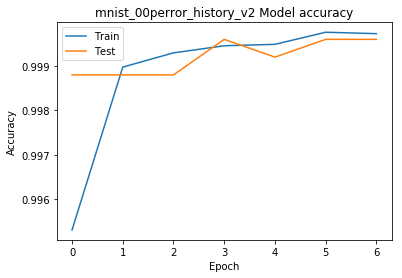

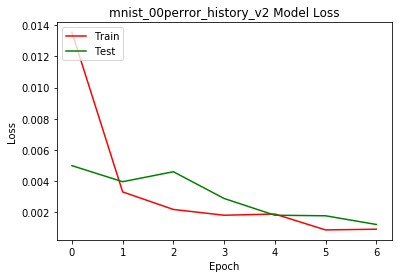

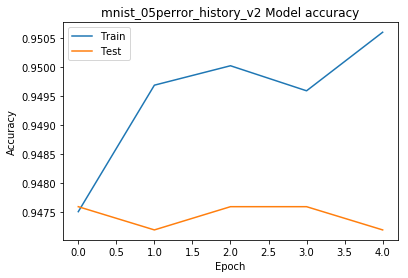

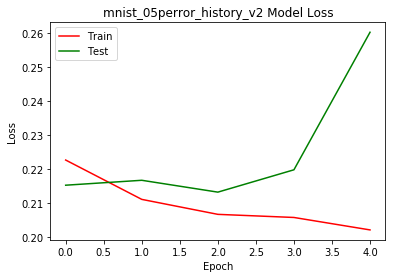

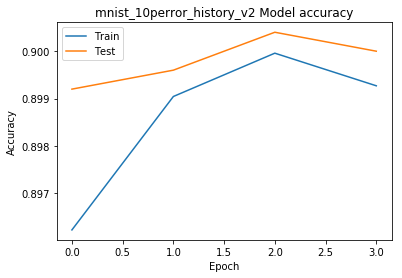

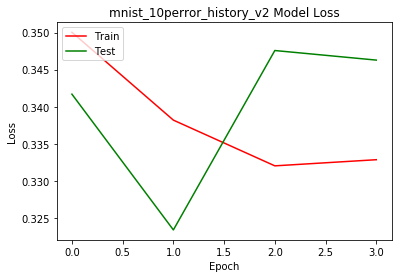

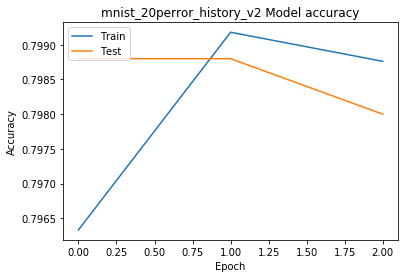

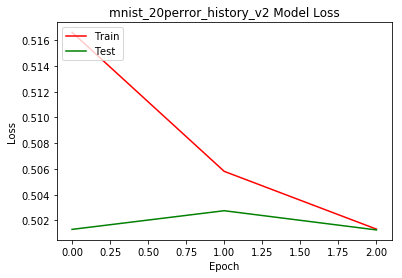

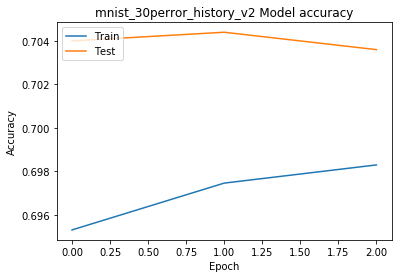

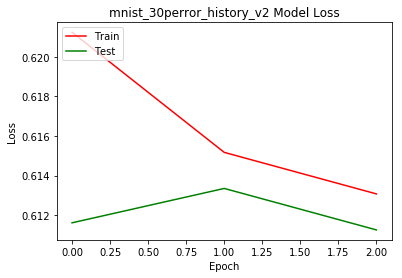

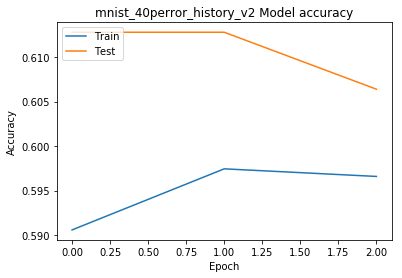

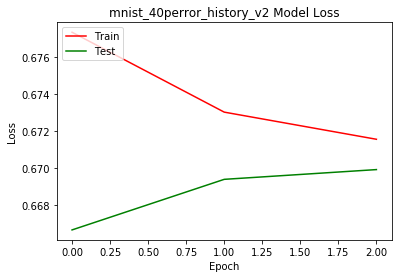

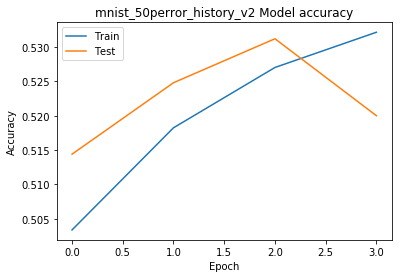

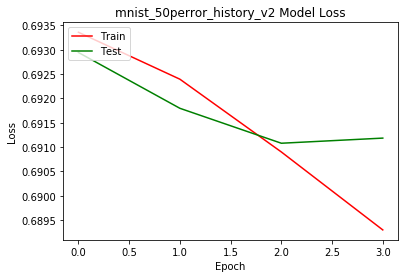

In [40]:
for f in files:
    history = h5py.File(f,'r')
    plt.plot(history['acc'][:])
    plt.plot(history['val_acc'][:])
    plt.title(f.split('.')[0]+' Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history['loss'],color='r')
    plt.plot(history['val_loss'],color='g')
    plt.title(f.split('.')[0]+' Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [41]:
weights = glob('*weights*v2*.h5')

In [42]:
weights

['mnist_00perror_weights_v2.h5',
 'mnist_05perror_weights_v2.h5',
 'mnist_10perror_weights_v2.h5',
 'mnist_20perror_weights_v2.h5',
 'mnist_30perror_weights_v2.h5',
 'mnist_40perror_weights_v2.h5',
 'mnist_50perror_weights_v2.h5']

In [43]:
label_error = []
test_acc = []
for w in weights:
    modelE.load_weights(w)
    loss, acc = modelE.evaluate(X,Y)
    label_error.append(int(w.split('_')[1].split('p')[0]))
    test_acc.append(acc)

65/65 [==============================] - 0s 5ms/step - loss: 0.7020 - accuracy: 0.4621


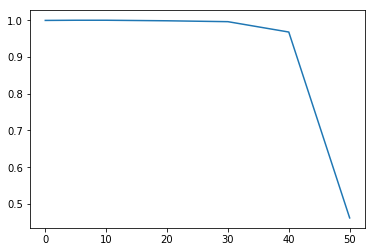

In [44]:
plt.plot(label_error,test_acc)